In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.optimize as sco

In [2]:
const = pd.read_csv('const_prices.csv', parse_dates=['Date'], index_col='Date')
const.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,11.971429,60.360001,89.169998,61.160000,27.730000,70.970001,33.738300,NaN,200.720001,41.070000,...,26.290001,64.540001,39.528004,53.549999,52.570000,NaN,35.306732,46.070000,47.549999,74.110001
2007-01-04,12.237143,59.919998,89.529999,61.000000,28.459999,70.279999,34.004654,NaN,198.850006,40.570000,...,26.379999,64.050003,39.565765,53.099998,52.910000,NaN,35.502777,46.160000,47.779999,72.720001
2007-01-05,12.150000,59.130001,89.150002,60.220001,28.469999,70.550003,33.728436,NaN,199.050003,39.790001,...,26.299999,63.500000,39.446194,52.410000,52.549999,NaN,34.895969,45.500000,47.389999,73.239998
2007-01-08,12.210000,59.689999,88.940002,60.290001,28.629999,71.449997,34.034248,NaN,203.729996,39.490002,...,26.160000,63.639999,39.767151,52.020000,53.320000,NaN,34.363850,45.689999,47.000000,72.650002
2007-01-09,13.224286,59.310001,88.000000,60.619999,28.469999,70.629997,33.984924,NaN,204.080002,39.320000,...,26.170000,63.480000,39.314034,51.889999,52.680000,NaN,34.503880,45.930000,47.389999,72.089996


In [3]:
dji = pd.read_csv('dji.csv', parse_dates=['Date'], index_col='Date')
dji.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000


In [12]:
df = pd.concat([const, dji['Close'].to_frame()], axis=1)
df.rename(columns={'Close': 'DJI'}, inplace=True)
df.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,11.971429,60.360001,89.169998,61.160000,27.730000,70.970001,33.738300,NaN,200.720001,41.070000,...,64.540001,39.528004,53.549999,52.570000,NaN,35.306732,46.070000,47.549999,74.110001,12474.519531
2007-01-04,12.237143,59.919998,89.529999,61.000000,28.459999,70.279999,34.004654,NaN,198.850006,40.570000,...,64.050003,39.565765,53.099998,52.910000,NaN,35.502777,46.160000,47.779999,72.720001,12480.690430
2007-01-05,12.150000,59.130001,89.150002,60.220001,28.469999,70.550003,33.728436,NaN,199.050003,39.790001,...,63.500000,39.446194,52.410000,52.549999,NaN,34.895969,45.500000,47.389999,73.239998,12398.009766
2007-01-08,12.210000,59.689999,88.940002,60.290001,28.629999,71.449997,34.034248,NaN,203.729996,39.490002,...,63.639999,39.767151,52.020000,53.320000,NaN,34.363850,45.689999,47.000000,72.650002,12423.490234
2007-01-09,13.224286,59.310001,88.000000,60.619999,28.469999,70.629997,33.984924,NaN,204.080002,39.320000,...,63.480000,39.314034,51.889999,52.680000,NaN,34.503880,45.930000,47.389999,72.089996,12416.599609


In [6]:
more_info = pd.read_csv('const.csv')
more_info.head()

,Company,Exchange,Symbol,Industry,Date_Added,Ticker
0,3M,NYSE,NYSE: MMM,Conglomerate,1976-08-09,MMM
1,American Express,NYSE,NYSE: AXP,Financial services,1982-08-30,AXP
2,Apple Inc.,NASDAQ,AAPL,Information technology,2015-03-19,AAPL
3,Boeing,NYSE,NYSE: BA,Aerospace and defense,1987-03-12,BA
4,Caterpillar Inc.,NYSE,NYSE: CAT,Construction and Mining,1991-05-06,CAT


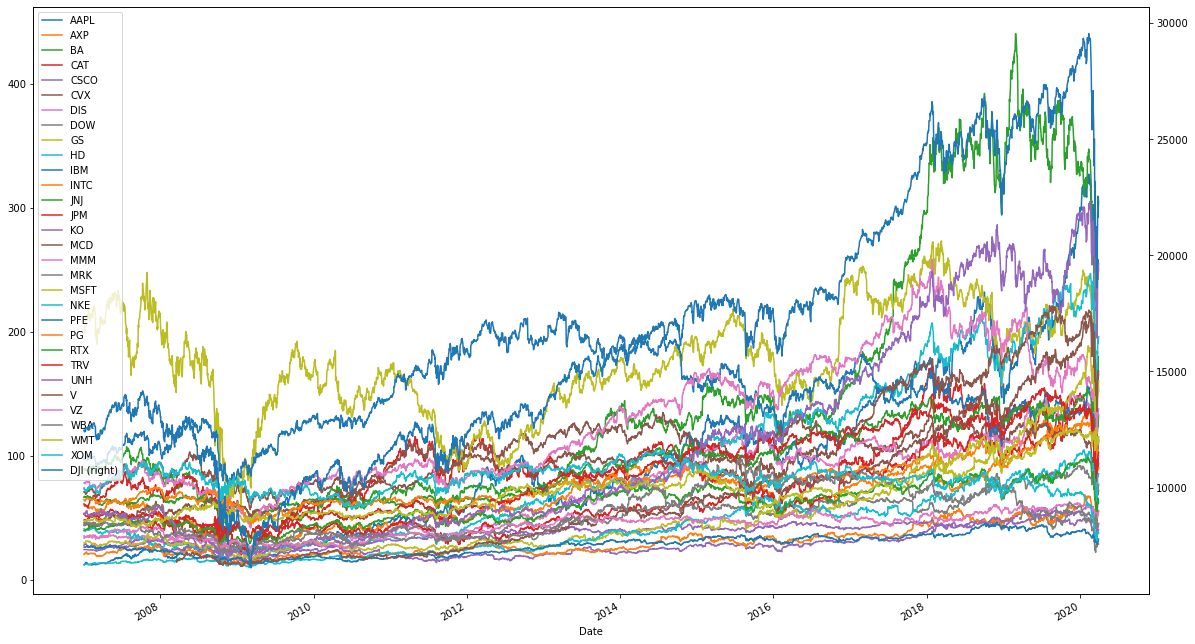

In [9]:
df.plot(figsize=(20,12), secondary_y='DJI')
plt.show()

In [13]:
#Normalize DF
normDF = 100 * df / df.iloc[0]

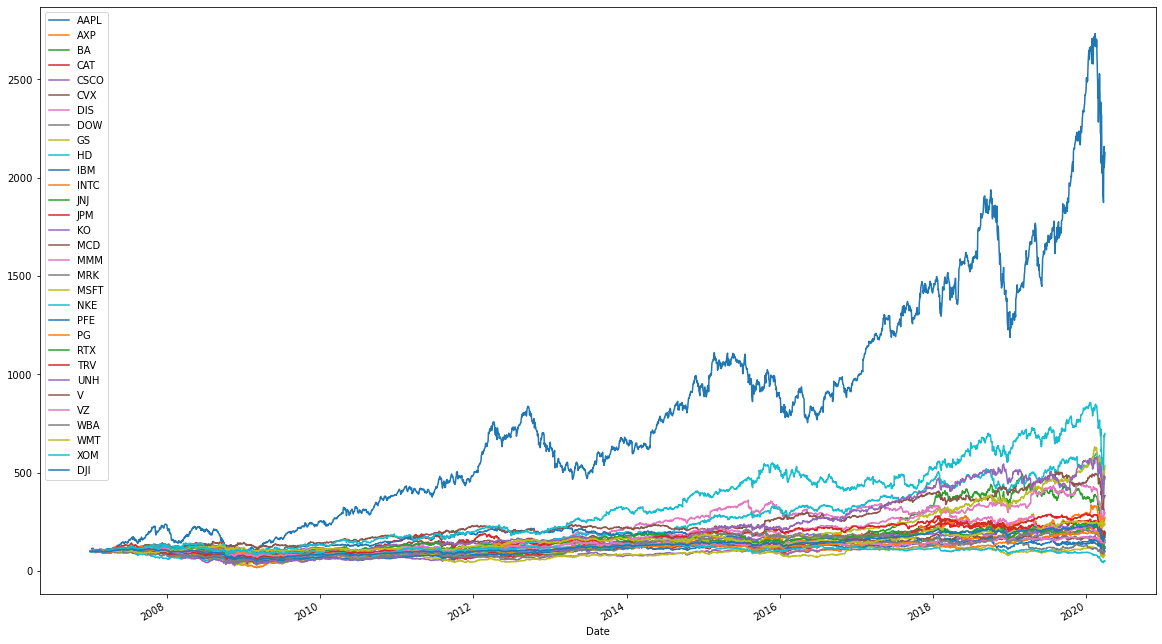

In [15]:
normDF.plot(figsize=(20,12))
plt.show()

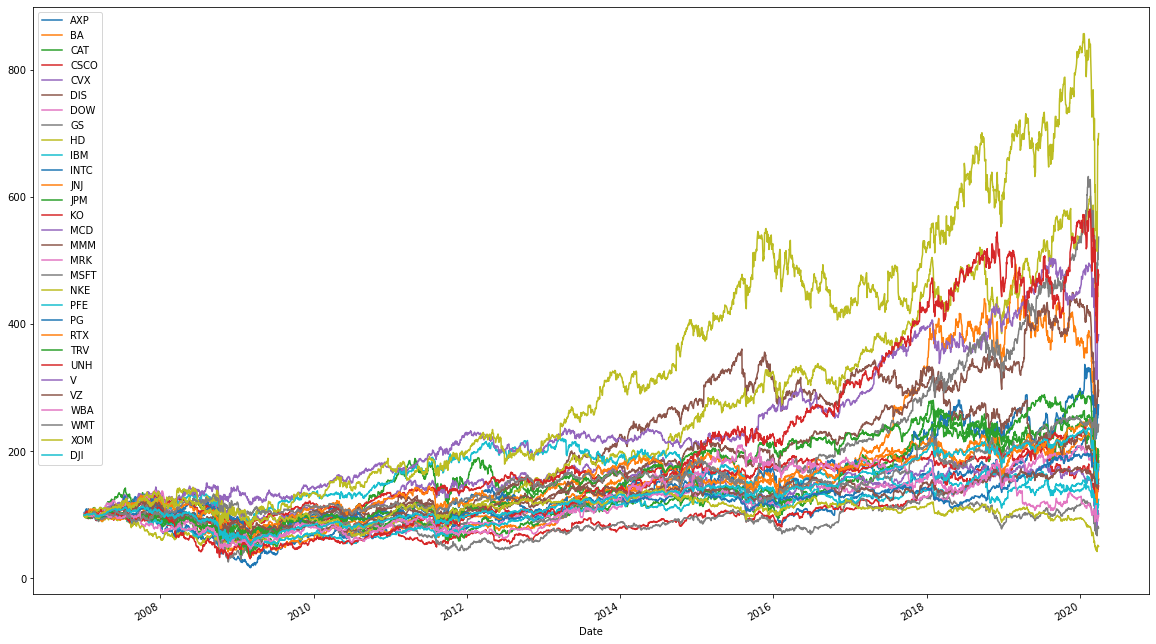

In [17]:
normDF.drop(columns=['AAPL']).plot(figsize=(20,12))
plt.show()

In [18]:
returns = df.pct_change()
returns.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.022196,-0.007290,0.004037,-0.002616,0.026325,-0.009722,0.007895,NaN,-0.009316,-0.012174,...,-0.007592,0.000955,-0.008403,0.006468,NaN,0.005553,0.001954,0.004837,-0.018756,0.000495
2007-01-05,-0.007121,-0.013184,-0.004244,-0.012787,0.000351,0.003842,-0.008123,NaN,0.001006,-0.019226,...,-0.008587,-0.003022,-0.012994,-0.006804,NaN,-0.017092,-0.014298,-0.008162,0.007151,-0.006625
2007-01-08,0.004938,0.009471,-0.002356,0.001162,0.005620,0.012757,0.009067,NaN,0.023512,-0.007540,...,0.002205,0.008137,-0.007441,0.014653,NaN,-0.015249,0.004176,-0.008230,-0.008056,0.002055
2007-01-09,0.083070,-0.006366,-0.010569,0.005474,-0.005589,-0.011477,-0.001449,NaN,0.001718,-0.004305,...,-0.002514,-0.011394,-0.002499,-0.012003,NaN,0.004075,0.005253,0.008298,-0.007708,-0.000555


In [19]:
returns.describe()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,259.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3029.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.001124,0.000404,0.000375,0.000393,0.000288,0.000172,0.000476,-0.001557,0.000221,0.000618,...,0.000244,0.000263,0.000362,0.000689,0.000996,0.000225,0.000153,0.000349,-0.000077,0.000252
std,0.020285,0.023861,0.020633,0.020599,0.018732,0.018264,0.017384,0.033533,0.024183,0.017243,...,0.011926,0.015987,0.018255,0.021072,0.019155,0.013661,0.017826,0.012961,0.015945,0.012395
min,-0.179195,-0.175949,-0.238484,-0.142822,-0.162107,-0.221248,-0.129846,-0.216577,-0.189596,-0.197938,...,-0.087373,-0.144765,-0.208004,-0.186362,-0.136435,-0.080685,-0.149873,-0.101832,-0.139525,-0.129265
25%,-0.007882,-0.007507,-0.008608,-0.008954,-0.007302,-0.007602,-0.006837,-0.014935,-0.009635,-0.006983,...,-0.004799,-0.006487,-0.006244,-0.008082,-0.007500,-0.006508,-0.008169,-0.005572,-0.007159,-0.003935
50%,0.000985,0.000643,0.000694,0.000392,0.000443,0.000633,0.000572,0.000554,0.000258,0.000528,...,0.000250,0.000508,0.000668,0.000616,0.001224,0.000525,0.000105,0.000540,0.000000,0.000560
75%,0.011166,0.009351,0.009931,0.010251,0.008722,0.008351,0.008090,0.012207,0.010234,0.008160,...,0.005530,0.007680,0.007360,0.009279,0.009248,0.006994,0.008873,0.006329,0.007235,0.005288
max,0.139050,0.218823,0.243186,0.147229,0.159505,0.227407,0.159722,0.209091,0.264678,0.140666,...,0.120090,0.157572,0.255556,0.347550,0.149973,0.146324,0.166355,0.117085,0.171905,0.113650


In [38]:
def annualizedSummary(returns):
    summary = returns.agg(['mean', 'std']).transpose()
    summary['Return'] = summary['mean'] * 252
    summary['Risk'] = summary['std'] * np.sqrt(252)
    return summary.loc[:, ['Return', 'Risk']]

In [47]:
summary = annualizedSummary(returns)

In [48]:
summary = summary.merge(more_info.loc[:, ['Ticker', 'Company']], how='left', left_index=True, right_on='Ticker').set_index('Company')
summary

,Return,Risk,Ticker
Company,,,
Apple Inc.,0.283326,0.322011,AAPL
American Express,0.101747,0.378787,AXP
Boeing,0.094477,0.327538,BA
Caterpillar Inc.,0.099013,0.327003,CAT
Cisco Systems,0.072630,0.297358,CSCO
Chevron Corporation,0.043249,0.289927,CVX
The Walt Disney Company,0.119955,0.275958,DIS
Dow Inc.,-0.392383,0.532319,DOW
Goldman Sachs,0.055702,0.383889,GS


In [49]:
summary2 = summary.drop(index= 'Dow Inc.')
summary2

,Return,Risk,Ticker
Company,,,
Apple Inc.,0.283326,0.322011,AAPL
American Express,0.101747,0.378787,AXP
Boeing,0.094477,0.327538,BA
Caterpillar Inc.,0.099013,0.327003,CAT
Cisco Systems,0.072630,0.297358,CSCO
Chevron Corporation,0.043249,0.289927,CVX
The Walt Disney Company,0.119955,0.275958,DIS
Goldman Sachs,0.055702,0.383889,GS
The Home Depot,0.155732,0.273726,HD


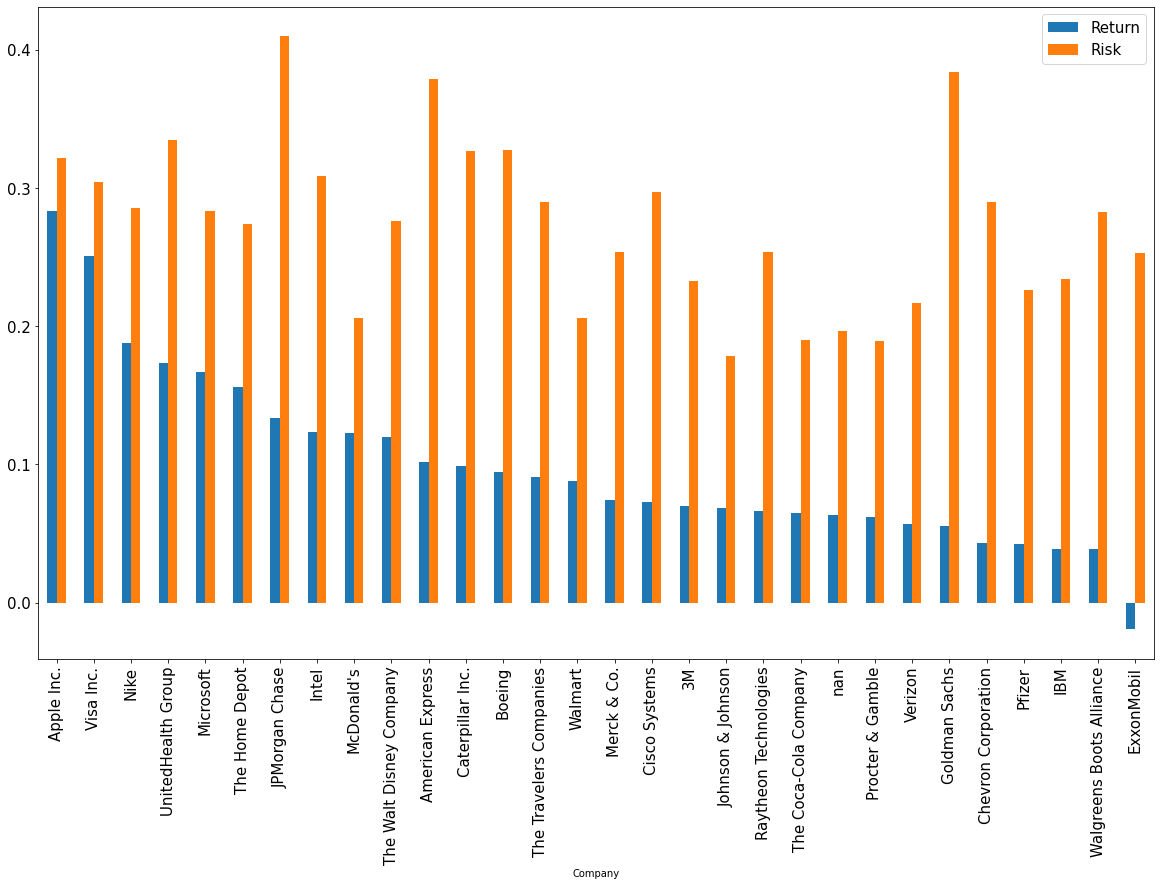

In [51]:
summary2.sort_values('Return', ascending=False).plot(kind='bar', figsize=(20, 12), fontsize=15)
plt.legend(fontsize=15)
plt.show()

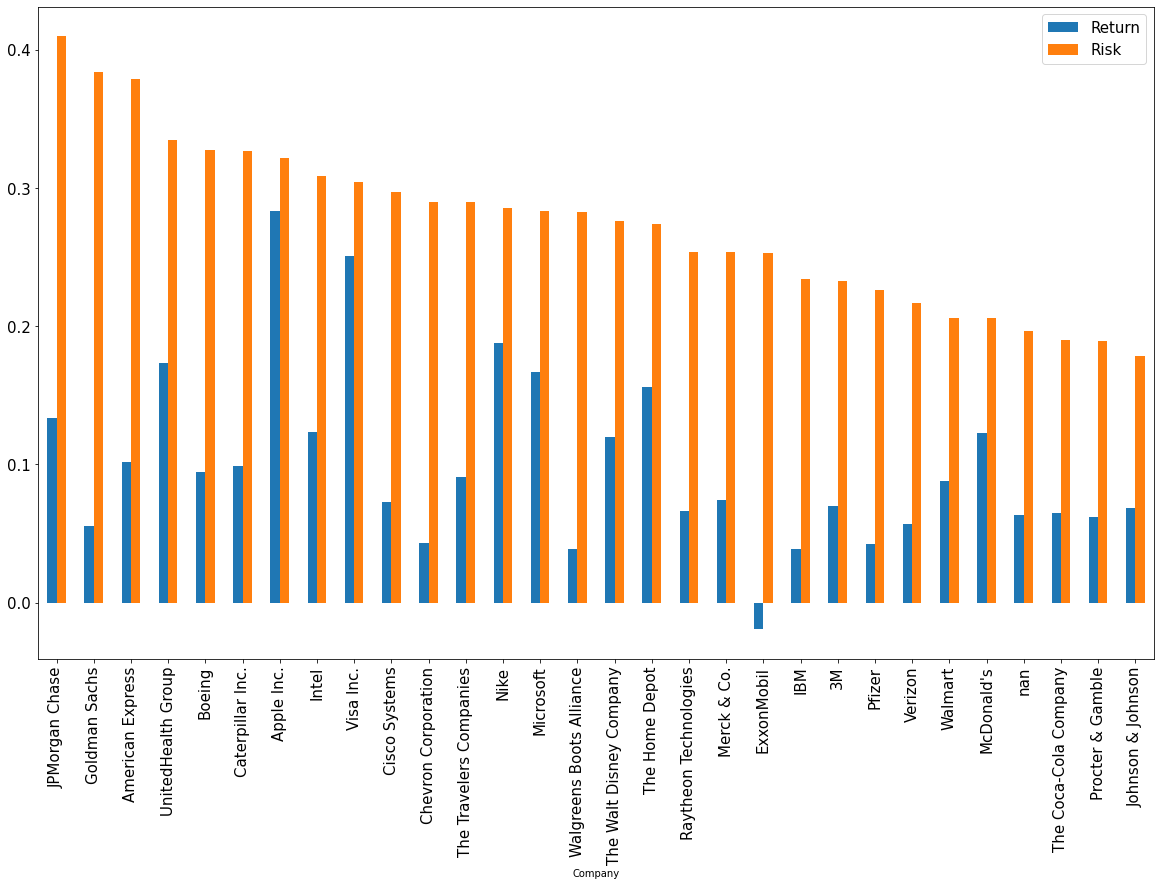

In [52]:
summary2.sort_values('Risk', ascending=False).plot(kind='bar', figsize=(20, 12), fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [53]:
summary2.set_index('Ticker', inplace=True)
summary2

,Return,Risk
Ticker,,
AAPL,0.283326,0.322011
AXP,0.101747,0.378787
BA,0.094477,0.327538
CAT,0.099013,0.327003
CSCO,0.072630,0.297358
CVX,0.043249,0.289927
DIS,0.119955,0.275958
GS,0.055702,0.383889
HD,0.155732,0.273726


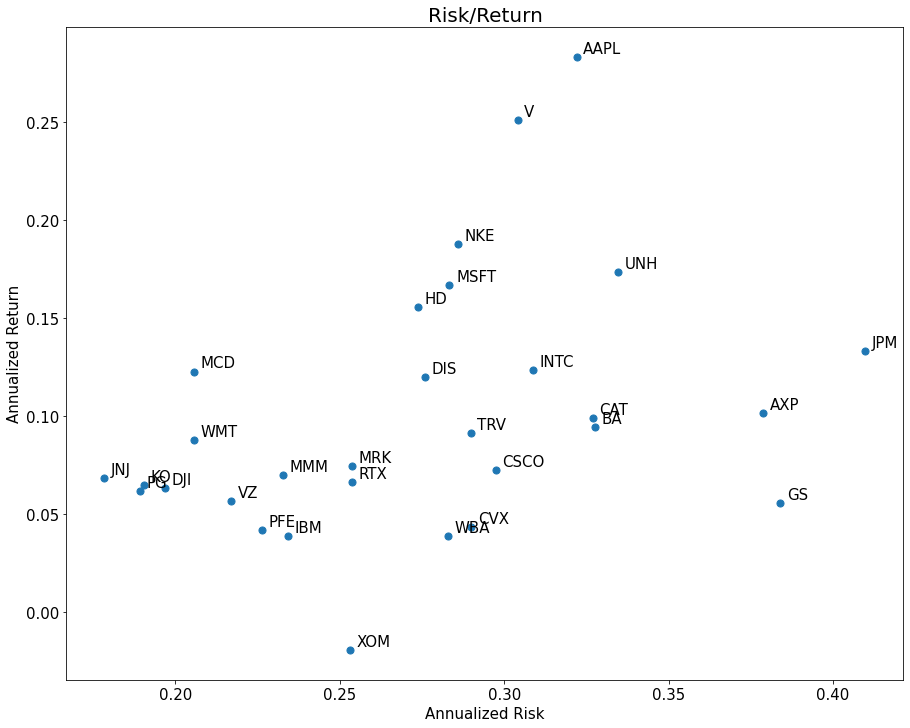

In [55]:
summary2.plot(kind='scatter', x='Risk', y='Return', figsize=(15, 12), s=50, fontsize=15)
for i in summary2.index:
    plt.annotate(i, xy=(summary2.loc[i, 'Risk'] + 0.002, summary2.loc[i, 'Return'] + 0.002), size=15)
plt.xlabel('Annualized Risk', fontsize=15)
plt.ylabel('Annualized Return', fontsize=15)
plt.title('Risk/Return', fontsize=20)
plt.show()

In [58]:
corr_matrix = returns.corr()
corr_matrix.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
AAPL,1.000000,0.480043,0.438086,0.487226,0.525349,0.449052,0.468580,0.631347,0.476691,0.463329,...,0.363393,0.498010,0.426388,0.390673,0.500869,0.355473,0.358347,0.322451,0.440548,0.621928
AXP,0.480043,1.000000,0.550139,0.595983,0.552228,0.573059,0.627933,0.585071,0.681464,0.602880,...,0.469506,0.632661,0.604635,0.463337,0.608325,0.462106,0.396338,0.372094,0.543933,0.771359
BA,0.438086,0.550139,1.000000,0.553999,0.485747,0.571662,0.566121,0.502373,0.501920,0.527704,...,0.417925,0.680807,0.465494,0.437456,0.470835,0.378064,0.368819,0.331806,0.562232,0.736430
CAT,0.487226,0.595983,0.553999,1.000000,0.568403,0.617253,0.585367,0.759624,0.565734,0.526940,...,0.411556,0.655219,0.473390,0.399110,0.501120,0.433708,0.402600,0.357269,0.617244,0.760203
CSCO,0.525349,0.552228,0.485747,0.568403,1.000000,0.533596,0.583010,0.596760,0.546383,0.531232,...,0.476467,0.587765,0.482416,0.405247,0.510966,0.459482,0.427154,0.416851,0.550696,0.727891


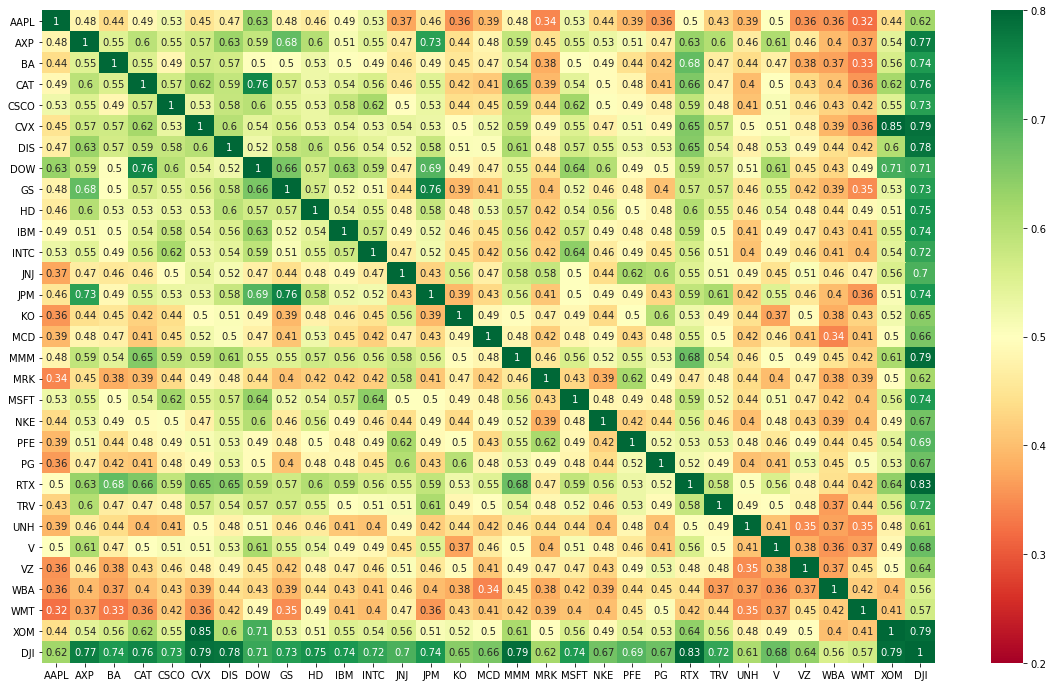

In [61]:
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, cmap='RdYlGn', annot=True, vmin=0.2, vmax=0.8)
plt.show()

In [66]:
# INDEX Tracking
df2 = df.loc['2017': '2018'].copy()
norm2 = 100 * df2 / df2.iloc[0]
returns2 = returns.loc['2017': '2018'].copy()
ret_diff = returns2.apply(lambda row: row - row['DJI'], axis=1)
ret_diff.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,-0.003180,0.011114,0.002257,0.007449,0.004559,-0.004755,0.011817,NaN,0.002824,-0.004314,...,-0.004602,0.005009,-0.018446,0.002781,0.012940,0.016451,-0.003613,-0.012685,0.000950,0.0
2017-01-04,-0.004157,0.009039,0.007474,-0.007507,-0.017445,-0.003293,0.009783,NaN,0.003420,0.005822,...,0.000525,-0.002406,-0.008414,-0.000189,0.005138,-0.004137,-0.002797,0.002788,-0.014040,0.0
2017-01-05,0.007235,-0.010177,0.002717,-0.003942,0.004475,-0.002179,0.001591,NaN,-0.005295,-0.009658,...,0.008777,0.006207,-0.013817,0.003817,0.013878,0.004351,0.002752,0.004322,-0.012757,0.0
2017-01-06,0.007906,-0.001250,-0.000785,-0.002812,-0.001253,-0.007248,0.011659,NaN,0.011593,-0.006005,...,-0.003595,0.007535,-0.003749,-0.001824,0.010570,-0.028498,-0.002399,-0.016968,-0.003807,0.0
2017-01-09,0.012987,0.008996,-0.001075,-0.003373,0.002174,-0.004731,-0.001861,NaN,-0.004379,0.009669,...,-0.003581,-0.005501,-0.004205,0.000996,-0.001767,-0.007062,-0.002791,0.010420,-0.012669,0.0


In [69]:
def annualizedTracking(ret_diff):
    summary = ret_diff.agg(['mean', 'std']).transpose()
    summary['Premium'] = summary['mean'] * 252
    summary['TE'] = summary['std'] * np.sqrt(252)
    return summary.loc[:, ['Premium', 'TE']]

In [107]:
tracking = annualizedTracking(ret_diff).sort_values('TE')

In [108]:
tracking_stocks = tracking.drop(index='DJI').head(10)

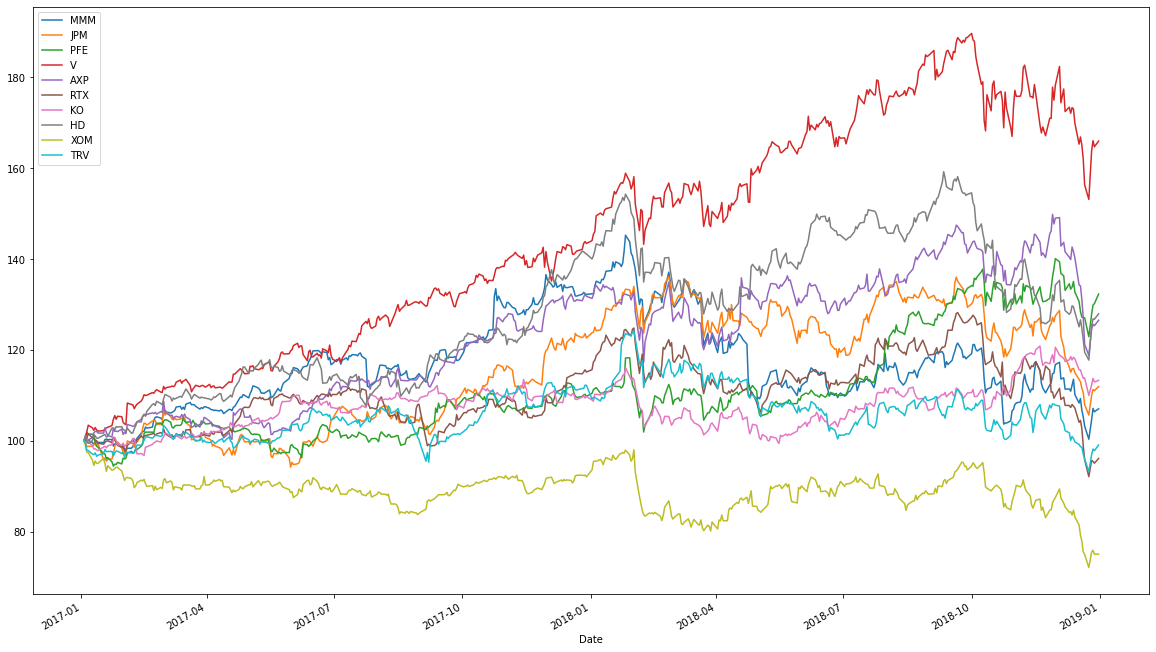

In [109]:
norm_track = norm2.loc[:, tracking_stocks.index]
norm_track.plot(figsize=(20,12))
plt.show()

In [110]:
# Equal weighted portfolio
eweights = np.full(10, .1)
eweights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [111]:
# Create weighted average by day
def portfolioReturns(weights, returns, tracking_stocks):
    return returns.loc[:, tracking_stocks.index].dot(weights)

# Function to be minimized
def trackingError(weights, returns, tracking_stocks):
    weightedReturns = portfolioReturns(weights, returns, tracking_stocks)
    return (weightedReturns - returns['DJI']).std() * np.sqrt(252)

In [118]:
# Equally weighted portfolio tracking error
trackingError(eweights, returns2, tracking_stocks)

0.04120933686266802

In [113]:
ewPortfolio = (portfolioReturns(eweights, returns2, tracking_stocks)[1:] + 1).cumprod() * 100

In [114]:
norm_track['DJI'] = norm2['DJI']
norm_track['EW Portfolio'] = ewPortfolio
norm_track.iloc[0, :] = 100

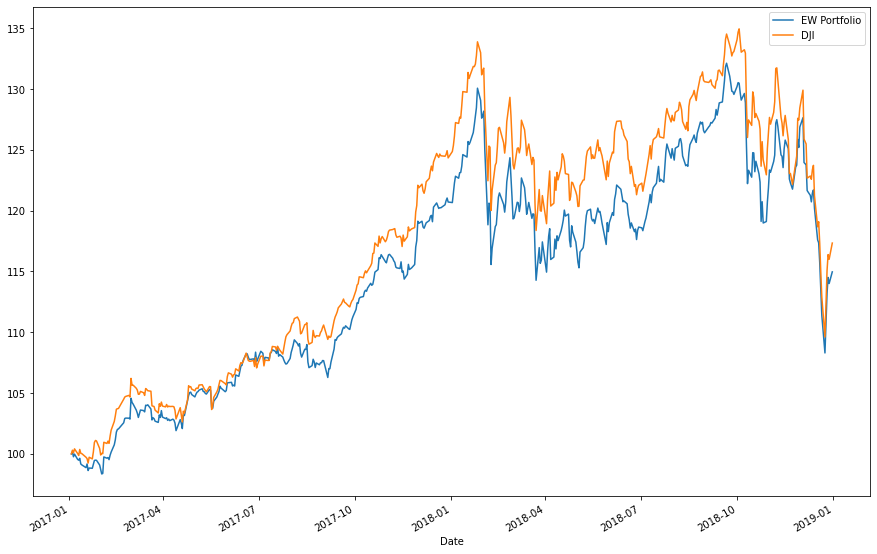

In [115]:
norm_track[['EW Portfolio', 'DJI']].plot(figsize=(15, 10))
plt.show()

In [116]:
# Weights must sum up to 1
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# All weights shall be between 0 and 1
bounds = tuple((0, 1) for x in range(10))

In [119]:
def strictTE(weights):
    return trackingError(weights, returns2, tracking_stocks)

# Optimization based on function to be minimized starting with equal weights and based on constraints and bounds
opts = sco.minimize(strictTE, eweights, method='SLSQP', bounds=bounds, constraints=cons)

In [120]:
opts

     fun: 0.03796156173952783
     jac: array([0.00744084, 0.00756334, 0.0074499 , 0.0074106 , 0.00737157,
       0.00733688, 0.00725428, 0.00753916, 0.00737198, 0.00768488])
 message: 'Optimization terminated successfully'
    nfev: 77
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.13101952, 0.14451522, 0.05984737, 0.16765083, 0.04028627,
       0.10054676, 0.07688202, 0.10956915, 0.11460304, 0.05507981])

In [121]:
optimal_weights = opts['x']
optimal_weights

array([0.13101952, 0.14451522, 0.05984737, 0.16765083, 0.04028627,
       0.10054676, 0.07688202, 0.10956915, 0.11460304, 0.05507981])

In [123]:
pd.Series(index=tracking_stocks.index, data=optimal_weights)

MMM    0.131020
JPM    0.144515
PFE    0.059847
V      0.167651
AXP    0.040286
RTX    0.100547
KO     0.076882
HD     0.109569
XOM    0.114603
TRV    0.055080
dtype: float64

In [131]:
optimalPortfolio = (portfolioReturns(optimal_weights, returns2, tracking_stocks)[1:] + 1).cumprod() * 100
optimalPortfolio

Date
2017-01-04    100.125313
2017-01-05     99.822671
2017-01-06    100.145521
2017-01-09     99.669085
2017-01-10     99.526402
                 ...    
2018-12-24    109.460454
2018-12-26    114.706689
2018-12-27    116.037462
2018-12-28    115.455022
2018-12-31    116.345589
Length: 501, dtype: float64

In [132]:
norm_track['Optimal Portfolio'] = optimalPortfolio
norm_track.iloc[0, :] = 100

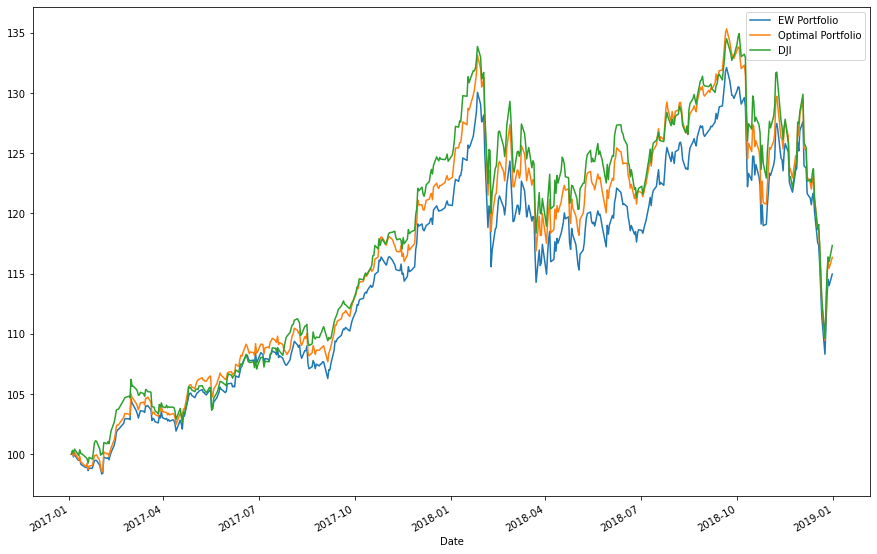

In [133]:
norm_track[['EW Portfolio', 'Optimal Portfolio', 'DJI']].plot(figsize=(15, 10))
plt.show()

In [142]:
annualizedSummary(norm_track[['EW Portfolio', 'Optimal Portfolio', 'DJI']].pct_change())

,Return,Risk
EW Portfolio,0.078256,0.127138
Optimal Portfolio,0.084879,0.131867
DJI,0.089562,0.135206


In [174]:
# Forward Testing
def tracking_error_generator(data, returns, tracking_stocks, weights, index, start, end):
    return (data.loc[start: end, tracking_stocks].dot(weights) - returns.loc[start:end, index]).std() * np.sqrt(252)

def visual(data, returns, tracking_stocks, weights, index, start, end): 
    track = ((data.loc[start:end, tracking_stocks].dot(weights) + 1).cumprod() * 100).to_frame()
    track.rename(columns={0: 'Portfolio'}, inplace=True)
    index = (data.loc[start:end, index] + 1).cumprod() * 100
    plt.figure(figsize=(12, 8))
    track.plot()
    index.plot()
    plt.legend(fontsize=10, loc=2)
    plt.show()

In [169]:
tracking_error_generator(returns, returns, tracking_stocks.index, optimal_weights, 'DJI', '2017-01-01', '2018-12-31')

0.03796156173952783

In [170]:
forwardTE = tracking_error_generator(returns, returns, tracking_stocks.index, optimal_weights, 'DJI', '2019-01-01', '2019-12-31')
forwardTE

0.04784303246340289

<Figure size 864x576 with 0 Axes>

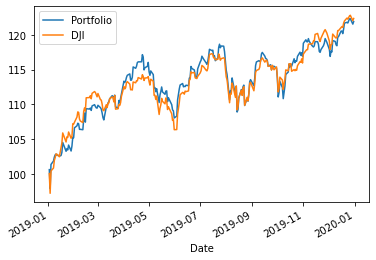

In [175]:
visual(returns, returns, tracking_stocks.index, optimal_weights, 'DJI', '2019-01-01', '2019-12-31')

In [176]:
bucket = df.columns.drop(['DOW', 'DJI'])
bucket

Index(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM',
       'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE',
       'PG', 'RTX', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT', 'XOM'],
      dtype='object')

In [178]:
random_numbers = np.random.random(10)
random_weights = random_numbers / random_numbers.sum()
random_weights

array([0.14633246, 0.11636061, 0.14501447, 0.12928898, 0.09057849,
       0.07149897, 0.09288422, 0.09058943, 0.09720977, 0.02024259])

In [179]:
np.random.seed(123)
random_stocks = np.random.choice(bucket, size=10, replace=False)
random_numbers = np.random.random(10)
random_weights = random_numbers / random_numbers.sum()

In [181]:
tracking_error_generator(returns, returns, random_stocks, random_weights, 'DJI', '2019-01-01', '2019-12-31')

0.05553660882031692

In [182]:
forwardTE

0.04784303246340289

<Figure size 864x576 with 0 Axes>

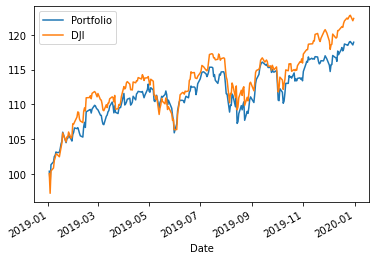

In [183]:
visual(returns, returns, random_stocks, random_weights, 'DJI', '2019-01-01', '2019-12-31')

In [184]:
tes = np.empty(10000)
np.random.seed(123)
for i in range(10000):
    random_stocks = np.random.choice(bucket, size=10, replace=False)
    random_numbers = np.random.random(10)
    random_weights = random_numbers / random_numbers.sum()
    
    tes[i] = tracking_error_generator(returns, returns, random_stocks, random_weights, 'DJI', '2019-01-01', '2019-12-31')

In [185]:
(tes < forwardTE).mean()

0.0736

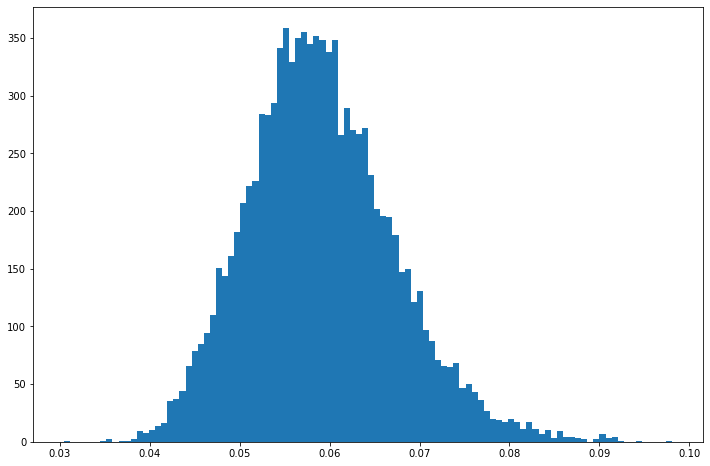

In [186]:
plt.figure(figsize=(12, 8))
plt.hist(tes, bins=100)
plt.show()